### LIBRARIES

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import pickle
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

In [5]:
df = pd.read_csv("comment_final.csv", encoding="utf-8", index_col=0)

### Check NAN again

In [6]:
missing_val_num = df.isnull().sum()
missing_percent = (missing_val_num / df.shape[0]) * 100
missing_info = {'missing_values': missing_val_num,
                'missing_percent': round(missing_percent,3)}
missing_df = pd.DataFrame(missing_info)
missing_df

,missing_values,missing_percent
processed_text,21720,11.075
class,0,0.000


In [7]:
# Drop all rows with NaN values
df.dropna(inplace=True)
print(df.shape)
print(df.isnull().sum())

(174397, 2)
processed_text    0
class             0
dtype: int64


### Duplicate Data

In [8]:
df[df.duplicated()]

,processed_text,class
4,sản_phẩm chất_lượng như_mô tả đóng_gói rất_đán...,positive
28,sản_phẩm bị_chảy rất_khó cắt nhão dính,negative
98,chất_lượng kém,negative
129,hàng,positive
132,dán,positive
...,...,...
196096,thiết,positive
196098,sản_phẩm tốt như_mô tả,positive
196099,hàng,positive
196104,xuất_hóa_đơn,neutral


In [9]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)
print('Duplicate data:', df.duplicated().sum())
print(df.shape)
# Reset index
df.reset_index(drop=True, inplace=True)

Duplicate data: 0
(134223, 2)


### TF-IDF

In [10]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)
x = tfidf_vectorizer.fit(df['processed_text'].values.astype('U'))
X = tfidf_vectorizer.transform(df['processed_text'].values.astype('U'))
df_new = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [11]:
df_new.head()

,bút,bền,chuột,chất_lượng,cẩn_thận,dây,dầu,giá,giấy,gói,...,êm,đóng,đóng gói,đóng_gói,đầu,đẹp,đổi,độ,ổn,ủng_hộ
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.251791,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.28168,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.251791,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.28168,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y = df['class']

In [13]:
print(X.shape, y.shape)

(134223, 52) (134223,)


### CROSS VALIDATION

In [14]:
# Choose 0.3, 0.2 as the test size
test_size_list = [.3, .2]
# Run 5 times for each test_size
for test_size in test_size_list:
  print('Test size: ', test_size)
  accuracy_train_list = []
  accuracy_test_list = []
  for i in range(5):
    print('Run: ', i)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # Create a LogisticReg (for faster training)
    clf = LogisticRegression()
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate the accuracy
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
  print('Test size: ', test_size, ' Train accuracy: ', sum(accuracy_train_list) / len(accuracy_train_list), ' Test accuracy: ',
      sum(accuracy_test_list) / len(accuracy_test_list))
  print('--------------------------------------------------')

Test size:  0.3
Run:  0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run:  1
Run:  2


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run:  3


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Run:  4
Test size:  0.3  Train accuracy:  0.7812018391587552  Test accuracy:  0.7804902277299028
--------------------------------------------------
Test size:  0.2
Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Test size:  0.2  Train accuracy:  0.7815753692562722  Test accuracy:  0.7799888247345875
--------------------------------------------------


- test size 0.2 vẫn tốt hơn môt chút, nhưng không đáng kể

In [15]:
#resampling data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Comparision

In [17]:
models = [
    ExtraTreesClassifier(n_estimators=50),
    ExtraTreesClassifier(n_estimators=100),
    RidgeClassifier(),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    LogisticRegression(multi_class='multinomial')
    
]

In [18]:
def get_model_name(model):
  model_name = model.__class__.__name__
  if model_name == 'KNeighborsClassifier':
    model_name = model_name + '_' + str(model.n_neighbors)
  elif model_name == 'RandomForestClassifier':
    model_name = model_name + '_' + str(model.n_estimators)
  elif model_name == 'ExtraTreesClassifier':
    model_name = model_name + '_' + str(model.n_estimators)
  return model_name

In [20]:
# Number of folds for cross validation
num_folds = 5
# A dataframe to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy Mean', 'Accuracy 3 * STD', 'Time'])
# Integrate through models
for model in models:
  # Get model name
  model_name = get_model_name(model)  
  print('Model: ', model_name, 'running...')
  # Get the current time
  start_time = datetime.now()  
  # Perform cross validation
  cv_results = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='accuracy', n_jobs=-1)  
  # Get the training time
  train_time = datetime.now() - start_time  
  # Get the mean and std of the results
  mean_cv_results = cv_results.mean()
  std_cv_results = cv_results.std()  
  # Store the results
  results = results.append({'Model': model_name,
                            'Accuracy Mean': mean_cv_results,
                            'Accuracy 3 * STD': 3 * std_cv_results,
                            'Time': train_time
                            }, ignore_index=True)

Model:  ExtraTreesClassifier_50 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  ExtraTreesClassifier_100 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  RidgeClassifier running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  RandomForestClassifier_50 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  RandomForestClassifier_100 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  KNeighborsClassifier_3 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  KNeighborsClassifier_5 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  KNeighborsClassifier_7 running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


Model:  LogisticRegression running...


C:\Users\Phat Thanh\AppData\Local\Temp\ipykernel_1160\3118795572.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name,


### Metric result

In [29]:
# Sort the dataframe by Accuracy Mean in descending order
results = results.sort_values(by='Accuracy Mean', ascending=False).reset_index(drop=True)
results

,Model,Accuracy Mean,Accuracy 3 * STD,Time
0,LogisticRegression,0.781138,0.002266,0 days 00:00:03.994868
1,RidgeClassifier,0.780123,0.002403,0 days 00:00:01.972007
2,RandomForestClassifier_100,0.777254,0.002639,0 days 00:01:21.902368
3,RandomForestClassifier_50,0.776211,0.003392,0 days 00:00:41.432746
4,ExtraTreesClassifier_100,0.773399,0.004827,0 days 00:01:30.528775
5,ExtraTreesClassifier_50,0.772840,0.004424,0 days 00:00:48.186215
6,KNeighborsClassifier_7,0.744277,0.072459,0 days 00:01:27.320648
7,KNeighborsClassifier_5,0.739621,0.040931,0 days 00:01:24.225831
8,KNeighborsClassifier_3,0.707081,0.066380,0 days 00:01:24.085568


Text(0.5, 1.0, 'Model Comparison')

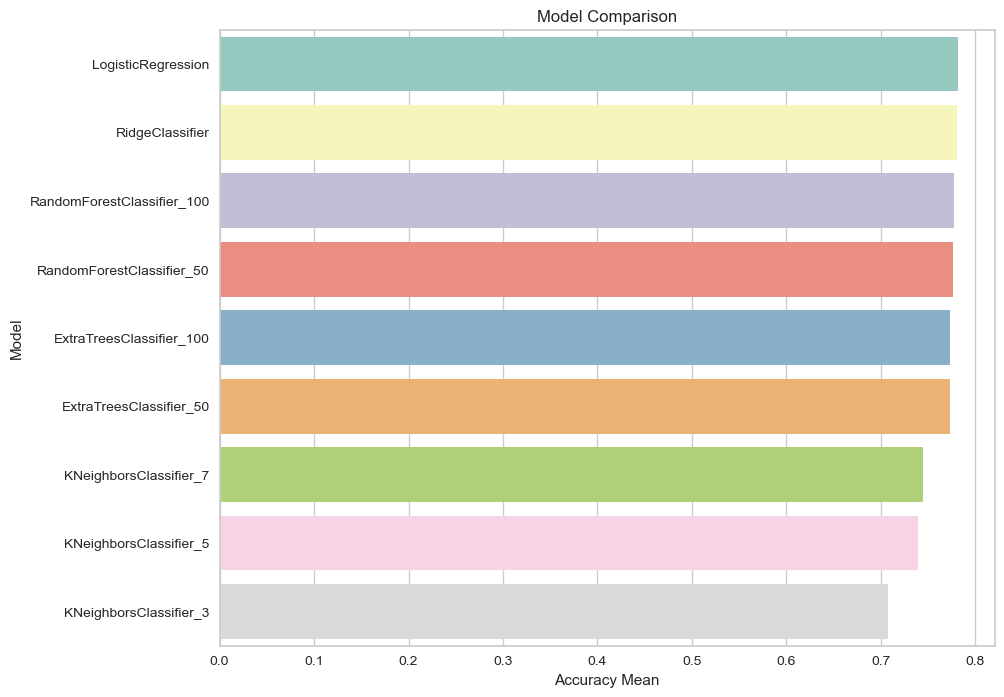

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Accuracy Mean', y='Model', data=results, palette='Set3')
plt.title('Model Comparison')

###
- Như vậy, ta có thể sơ bộ thấy mô hình logistic Reg cho kết quả tốt hơn các mô hình còn lại

### Classification Report

### 
- Đối với bài toán phân loại này, chúng ta cần quan tâm tới high Recall rating not_like.
- với high Recall cao, thì các True rating not-like phải cao, còn các False-not_like dự báo có thể cao hoặc thấp. 

### 
- Như vậy ta chon Logistic Regression cho việc tinh chỉnh mô hình tối ưu

### Logistic Regression

#### Hyperparameter tuning

In [23]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Create a list of parameters of Logistic Regression for the GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
#param_grid = {
    #'n_estimators': [100,300, 500, 1000],
    #'learning_rate':[0.001,0.01,0.1, 1]
#}
# Create a list of models to test
clf_grid = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,cv=5, scoring='accuracy', error_score=0)
search_clf = clf_grid.fit(X_train, y_train)
best_clf = search_clf.best_estimator_

##Score
#cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

In [24]:
print('Best params:', search_clf.best_params_)

Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


### Best Params

In [25]:
## Create the best model
best_model = LogisticRegression(C= 100,penalty='l2',solver= 'newton-cg')
# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

### Metrics to Report

In [26]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train, y_train) * 100, 3)
accuracy_test = round(best_model.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

Accuracy score for the best model on the training data:  78.102
Accuracy score for the best model on the test data:  78.171


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.59      0.12      0.21      4123
     neutral       0.00      0.00      0.00      1984
    positive       0.79      0.99      0.88     20738

    accuracy                           0.78     26845
   macro avg       0.46      0.37      0.36     26845
weighted avg       0.70      0.78      0.71     26845



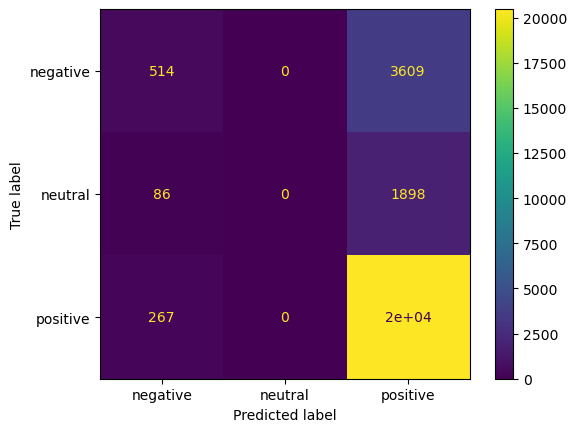

In [27]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

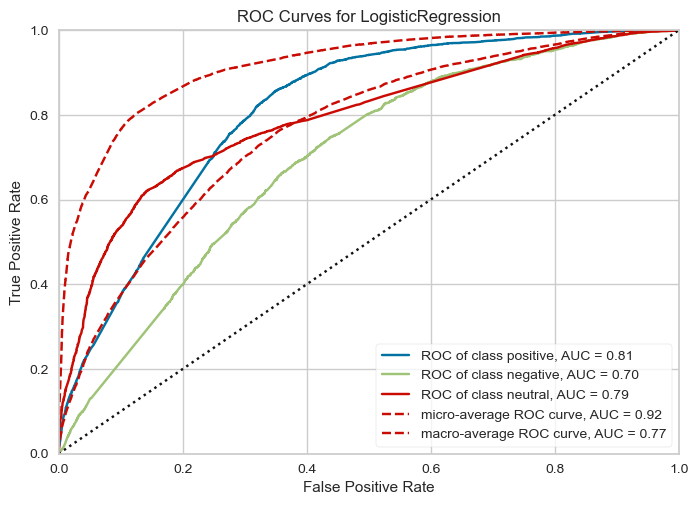

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Nhận xét
- Mô hình 3 lớp cho phân loại kém, không caie thiện được nhiều
- do giới hạn về thời gian, tác giả sẽ tiếp tục với mô hình phân loại 2 lớp
- như đã nếu ở phần 1, các comment neutral vẫn có khả năng xếp vào nhóm khách hàng cần phải cải thiện.
- Nên thử mức độ tương đồng của 2 nhóm trên.